In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RK4 import *

In [2]:
#Constants [L] = AU, [T] = years, [M] = solar mass 
G = 1.; M = 1.; c = 1.;
Rs = 2*G*M/(c**2)

In [3]:
def f(t0, q0):
    t=q0[0]; r=q0[1]; theta=q0[2]; phi=q0[3]
    dt=q0[4]; dr=q0[5]; dtheta=q0[6]; dphi=q0[7]
    f = np.zeros(8)
    f[0] = dt
    f[1] = dr
    f[2] = dtheta
    f[3] = dphi    
    f[4] = -2*G*M*dr*dt/(r*(r-2*G*M))
    f[5] = -G*M*dt**2*(r-2*G*M)/(r**3)+G*M*dr**2/(r*(r-2*G*M))+(r-2*G*M)*(dtheta**2+(np.sin(theta)*dphi)**2)
    f[6] = -2*dtheta*dr/r+np.sin(theta)*np.cos(theta)*dphi**2
    f[7] = -2*(dphi*dr/r+np.cos(theta)*dtheta*dphi/np.sin(theta))
    return f

In [4]:
def eff_potential(r,epsilon,L):
    return (1 - 2*G*M/r)*(L**2/r**2 + epsilon)

In [5]:
T = 6000000. # GM/c^3
t0 = 0
tf = 1*T
n = 100000

t = np.linspace(t0,tf,n)
h = (tf - t0)/n

Q = np.zeros([n,8])

In [6]:
L0 = np.sqrt(12)*5.; eps = np.sqrt(1-12/L0**2); r0 = 200#L0**2*(1+eps)/2
#r0 = L0*(L0-np.sqrt(L0**2-12))/2
E0 = np.sqrt(eff_potential(r0,1.,L0))
dr0 = 0.#np.sqrt(E0**2-eff_potential(r0,1.,L0))
dt0 = E0/(1-2*G*M/r0); dphi0 = L0/(r0**2)
Q[0,0] = t0
Q[0,1] = r0
Q[0,2] = np.pi*0.5
Q[0,3] = 0.

Q[0,4] = dt0
Q[0,5] = dr0
Q[0,6] = 0.
Q[0,7] = dphi0

In [7]:
rq = np.roots([1-eff_potential(L0**2*(1+eps)/2,1.,L0),-2.,L0**2,-2*L0])
np.abs(rq)

array([2.98874648e+02, 2.98874648e+02, 1.15559063e-01])

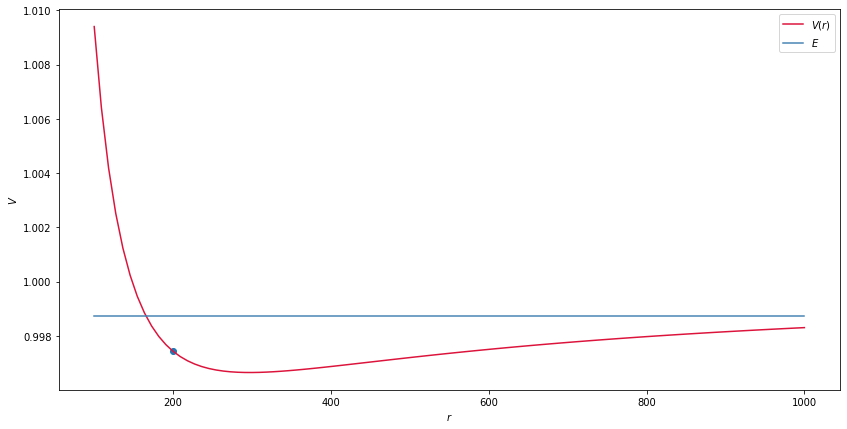

In [20]:
r = np.linspace(r0-100,r0+800,100)
#V = eff_potential(r,1.,L0)
plt.figure(figsize=(14,7))
#plt.plot(r,np.zeros(len(r)),color='black')
plt.plot(r,eff_potential(r,1.,L0),color='crimson',label=f'$V(r)$')
plt.plot(r,E0*np.ones(len(r)),color='steelblue',label='$E$')
plt.scatter(r0,eff_potential(r0,1.,L0),marker='o')
#plt.scatter(rmin,eff_potential(rmin,1.,L0),marker='o')
#plt.scatter(rmax,eff_potential(rmax,1.,L0),marker='o')
#plt.xlim([rq[1],rq[0]])
#plt.ylim([E0-0.01,E0+0.01])
plt.xlabel('$r$')
plt.ylabel('$V$')
plt.legend()
plt.show()

In [9]:
%%time
for i in range(1,n):
    q0 = Q[i-1]
    Q[i] = RK4(f, h, 0, q0)
    if Q[i,1] <= Rs:
        print('chocó!')
        break
    

CPU times: user 17.7 s, sys: 35.5 ms, total: 17.7 s
Wall time: 18 s


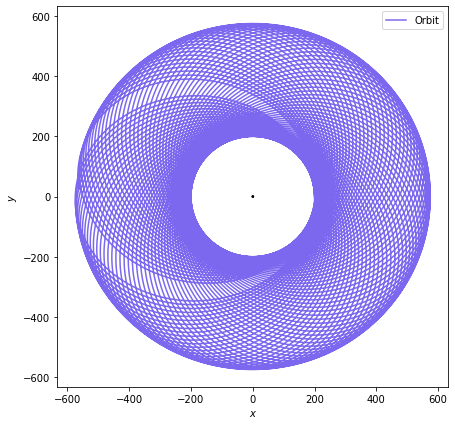

In [22]:
tc=n
x = Q[0:tc,1]*np.cos(Q[0:tc,3])*np.sin(Q[0:tc,2])
y = Q[0:tc,1]*np.sin(Q[0:tc,3])*np.sin(Q[0:tc,2])
ang = np.linspace(0,2*np.pi,100)
plt.figure(figsize=(7,7))
plt.plot(x, y, color = 'mediumslateblue',label = 'Orbit')
plt.plot(Rs*np.cos(ang),Rs*np.sin(ang),color='black')
#plt.scatter(0,0,marker='o',color='black')
#plt.xlim([-r0*1.5,r0*1.5])
#plt.ylim([-r0*1.5,r0*1.5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
#plt.savefig('Orbit.png')
plt.show()

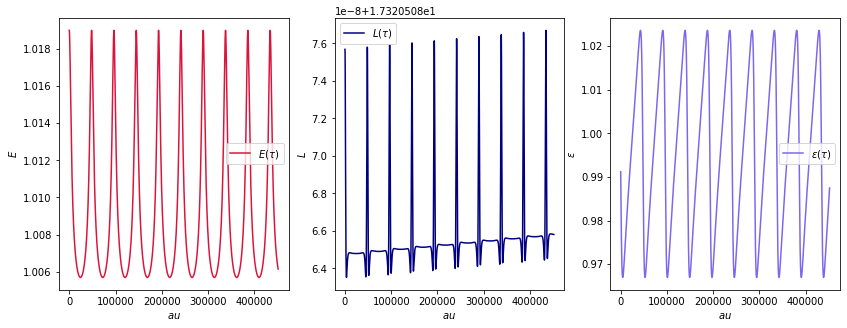

In [11]:
fig,ax = plt.subplots(1,3, figsize=(14,5))
energy = Q[0:tc,4]/(1-2/Q[0:tc,1])
ax[0].plot(Q[0:tc,0], energy, color = 'crimson',label = r'$E(\tau)$')
ax[0].set_xlabel('$\tau$')
ax[0].set_ylabel('$E$')
ax[0].legend()
angular_momentum = Q[0:tc,7]*Q[0:tc,1]**2
ax[1].plot(Q[0:tc,0], angular_momentum, color = 'navy',label = r'$L(\tau)$')
ax[1].set_xlabel('$\tau$')
ax[1].set_ylabel('$L$')
ax[1].legend()

epsilon = Q[0:tc,4]*(1-2/Q[0:tc,1])-Q[0:tc,5]/(1-2/Q[0:tc,1])-(Q[0:tc,1]*np.sin(Q[0:tc,2])*Q[0:tc,7])**2
ax[2].plot(Q[0:tc,0], epsilon, color = 'mediumslateblue',label = r'$\epsilon(\tau)$')
ax[2].set_xlabel('$\tau$')
ax[2].set_ylabel('$\epsilon$')
ax[2].legend()

plt.savefig('conserved_q.png')
plt.show()

In [12]:
np.max(energy)-np.min(energy)

0.013289905113006428

In [13]:
np.max(angular_momentum) - np.min(angular_momentum)

1.3177913871231794e-08

In [14]:
np.max(epsilon)-np.min(epsilon)

0.056654824276742066

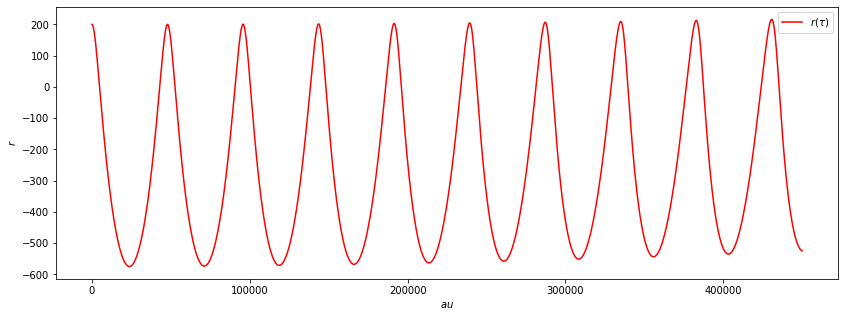

In [21]:
fig,ax = plt.subplots(1,1, figsize=(14,5))
ax.plot(t[0:tc], x, color = 'red',label = r'$r(\tau)$')
ax.set_xlabel('$\tau$')
ax.set_ylabel('$r$')
ax.legend()

plt.show()